<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Unsupervised_Learning/K-Means%20Clustering/k_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Means Clustering Implementation
##Introduction
k-means clustering is a type of unsupervised machine learning in which the number of clusters, k, are an input parameter to the model. The model then uses k centroids in the data to assign each data point to the nearest centroid, creating clusters. In the next iteration, the new centroids are the average of all of the points assigned to each cluster. This repeats until, hopefully, the model converges. It is useful for identifying spherical clusters but not so much other shapes (see DBSCAN for clustering by density).

## Imports and Data Loading

For this example, we'll generate some random data in blob form.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme
sns.set_theme()

from sklearn.datasets import make_blobs
#X, y = make_blobs(n_samples = 100, centers = 4, n_features = 2, random_state = 0)
X, y = make_blobs(n_samples=124, centers=5, n_features=2, random_state=3, cluster_std=2)


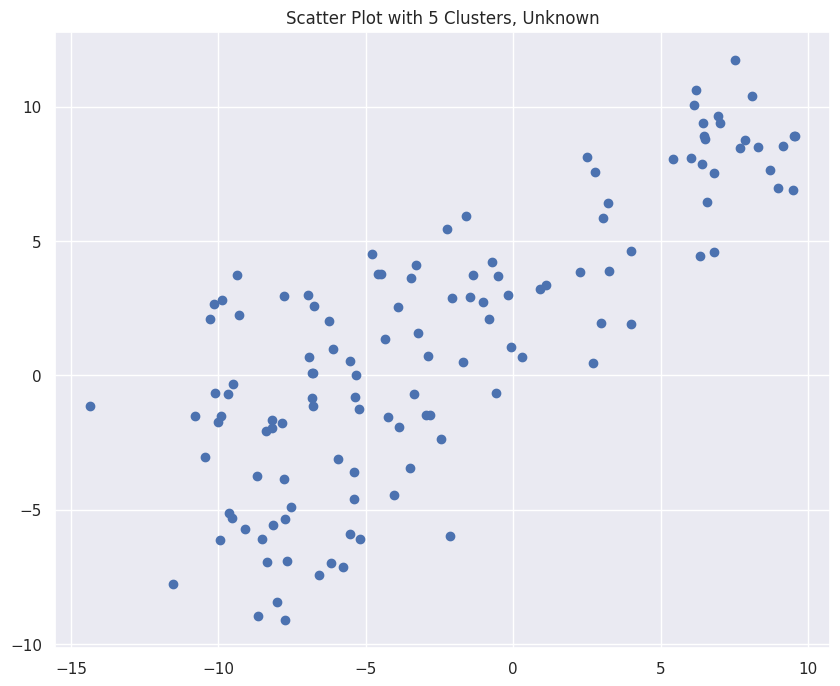

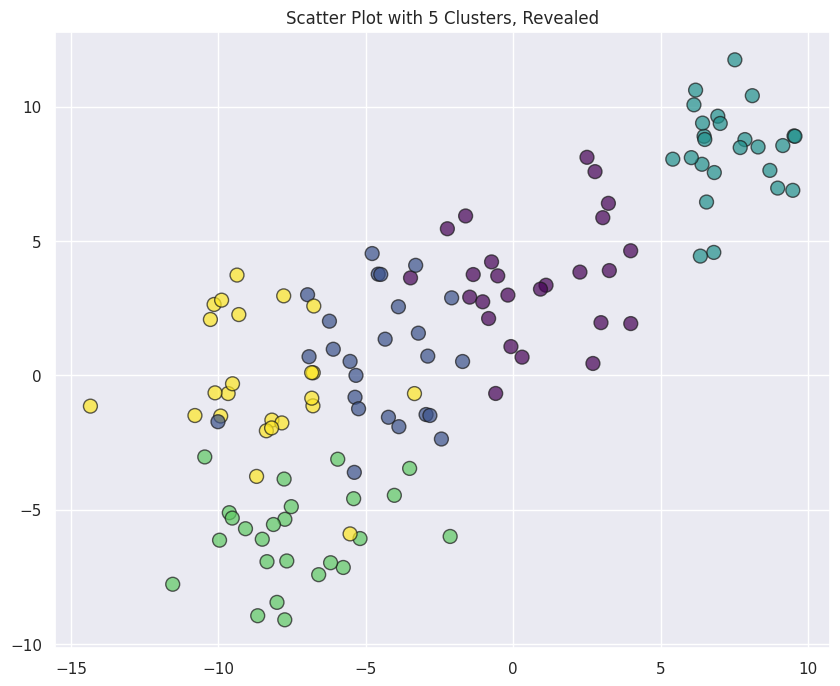

In [2]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Scatter Plot with 5 Clusters, Unknown')
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100, alpha=0.7)
plt.title('Scatter Plot with 5 Clusters, Revealed')
plt.show()

The visualization above shows the generated data both labeled and unlabeled. The second plot, with color coded labeled data, is just for demonstration and comparison purposes. The model being trained will only have the unlabeled version, the firt plot, to start with.

## Identify Starting Centoids
We want the model to find us 5 clusters, so we will start with 5 random center points from the data.

In [3]:
centers = []
for k in range(5):
    i = np.random.randint(0, 100)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

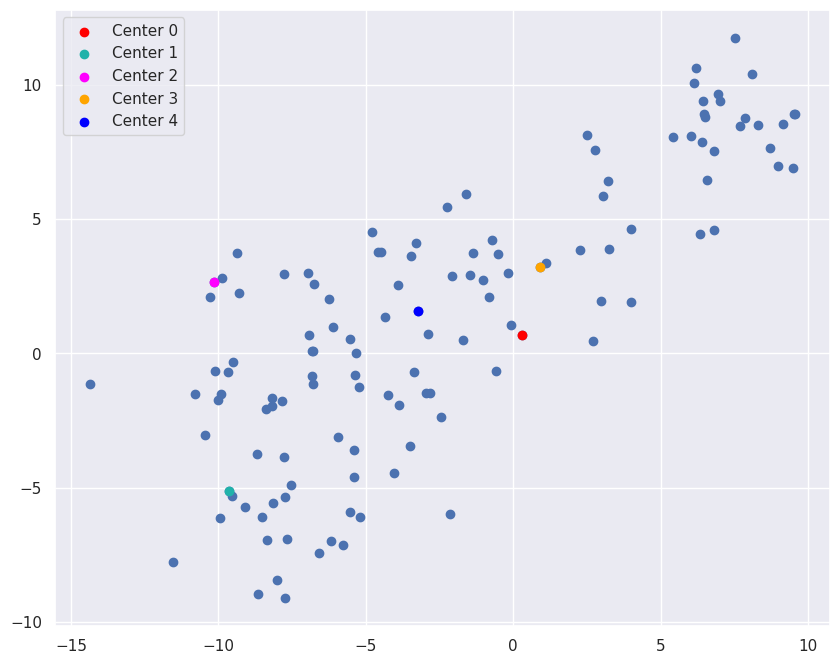

In [4]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])

colors = ["red", "lightseagreen", "magenta", "orange", "blue"]
for idx, center in enumerate(centers):
    plt.scatter([center[0]], [center[1]], color=colors[idx], label=f'Center {center[2]}')
plt.legend()
plt.show()

## Implementing k-Means Clustering, First Iteration

In [5]:
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label

def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

<ipython-input-6-f0896ed3e0b8>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", 5) #


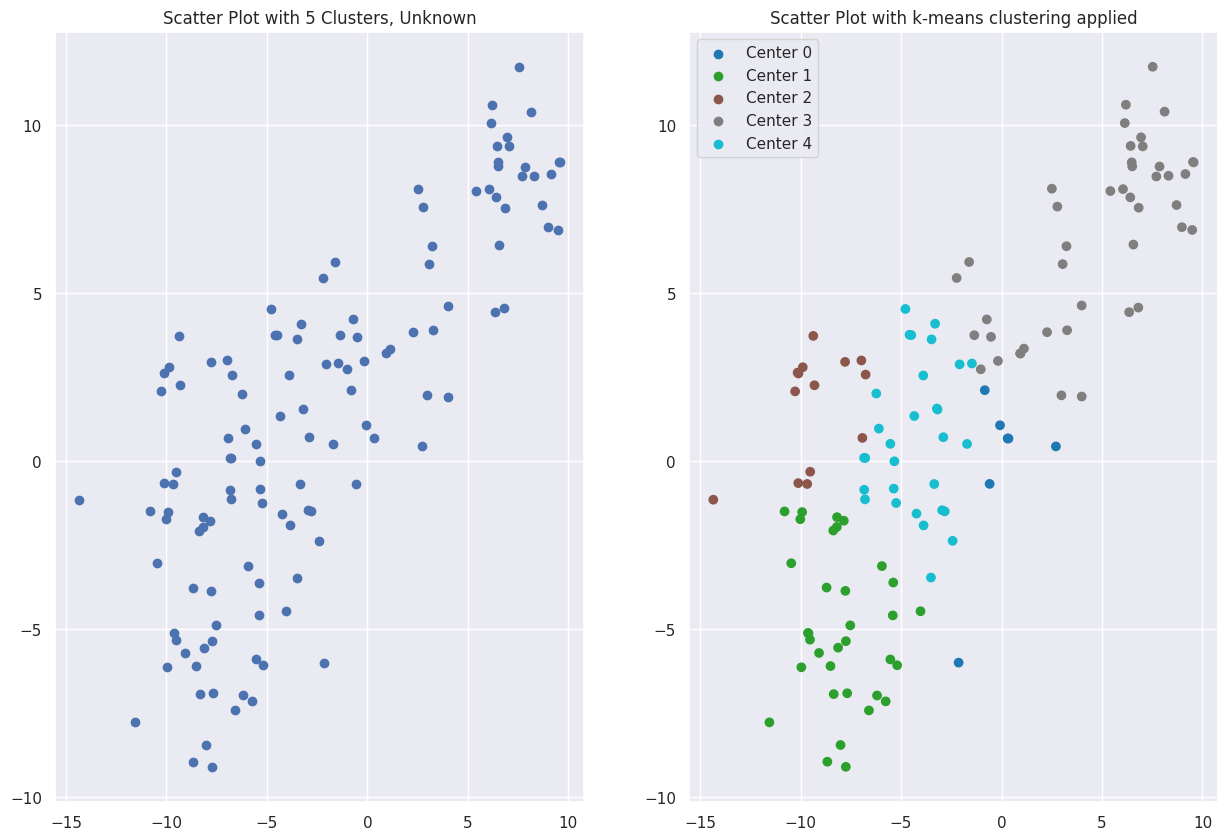

In [6]:
current_labels = assign_clusters(X, centers)
colors = plt.cm.get_cmap("tab10", 5) #
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Scatter Plot with 5 Clusters, Unknown')

ax2.scatter(X[:, 0], X[:, 1], c=current_colors)
for idx, center in enumerate(centers):
    ax2.scatter([center[0]], [center[1]], color=colors(idx), label=f'Center {center[2]}')
ax2.set_title('Scatter Plot with k-means clustering applied')

ax2.legend()
plt.show()

Based on our first randomly selected centroids, the right hand plot shows how the model has allocted data into the first iteration of our 5 clusters.

## Updating and Visualizing Model Iterations

Next we will take the new centroids to be the average of all the points in that centtroid's cluster. With the updated centroids we can view the new splits of our 5 clusters, and iterate a few more times. Once the centroids aren't really "moving" much between updates, the model has converged on the indicated number of clusters.

In [7]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur

    return [(center_means[i][0], center_means[i][1]) for i in center_means]

In [8]:
new_centers = update_centers(X, centers)

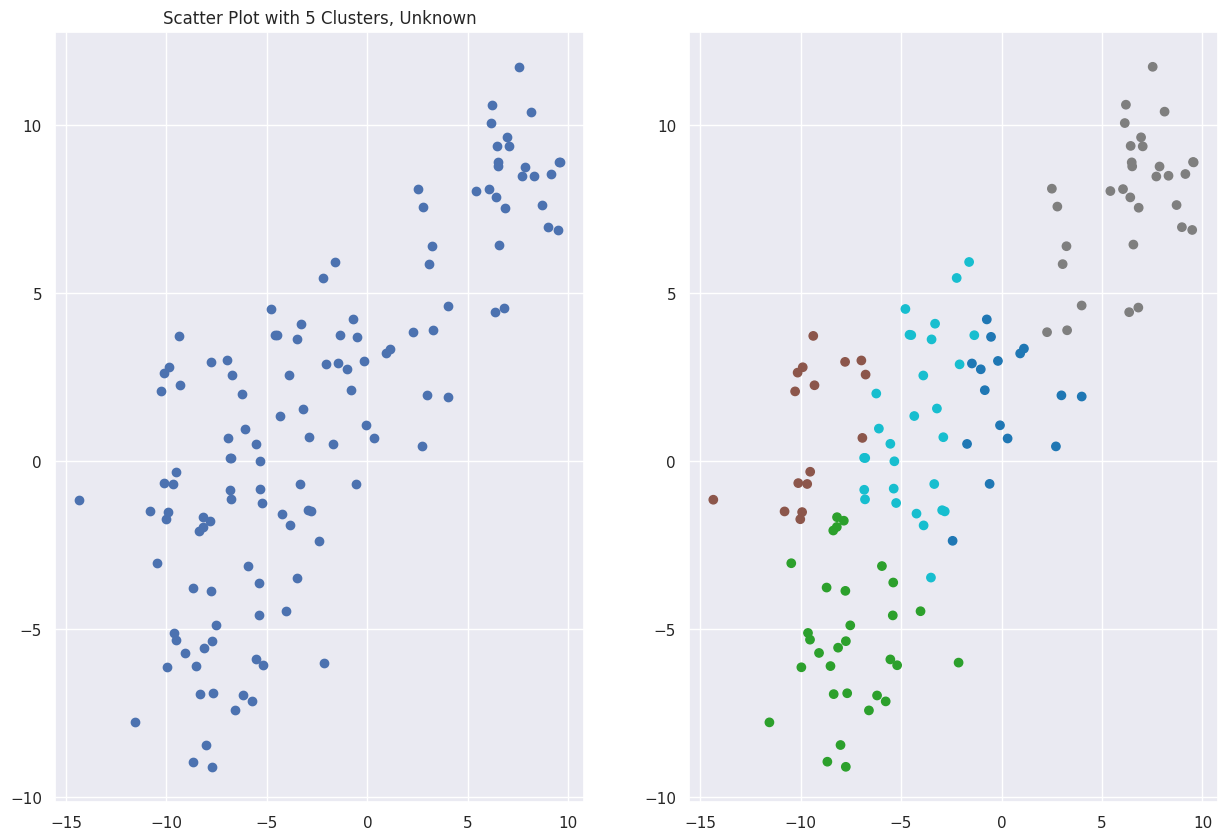

In [9]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Scatter Plot with 5 Clusters, Unknown')

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

This new cluster looks different from the initial scatterplot with random points. The dark blue and brown clusters have grown, and grey has shrunk a bit.

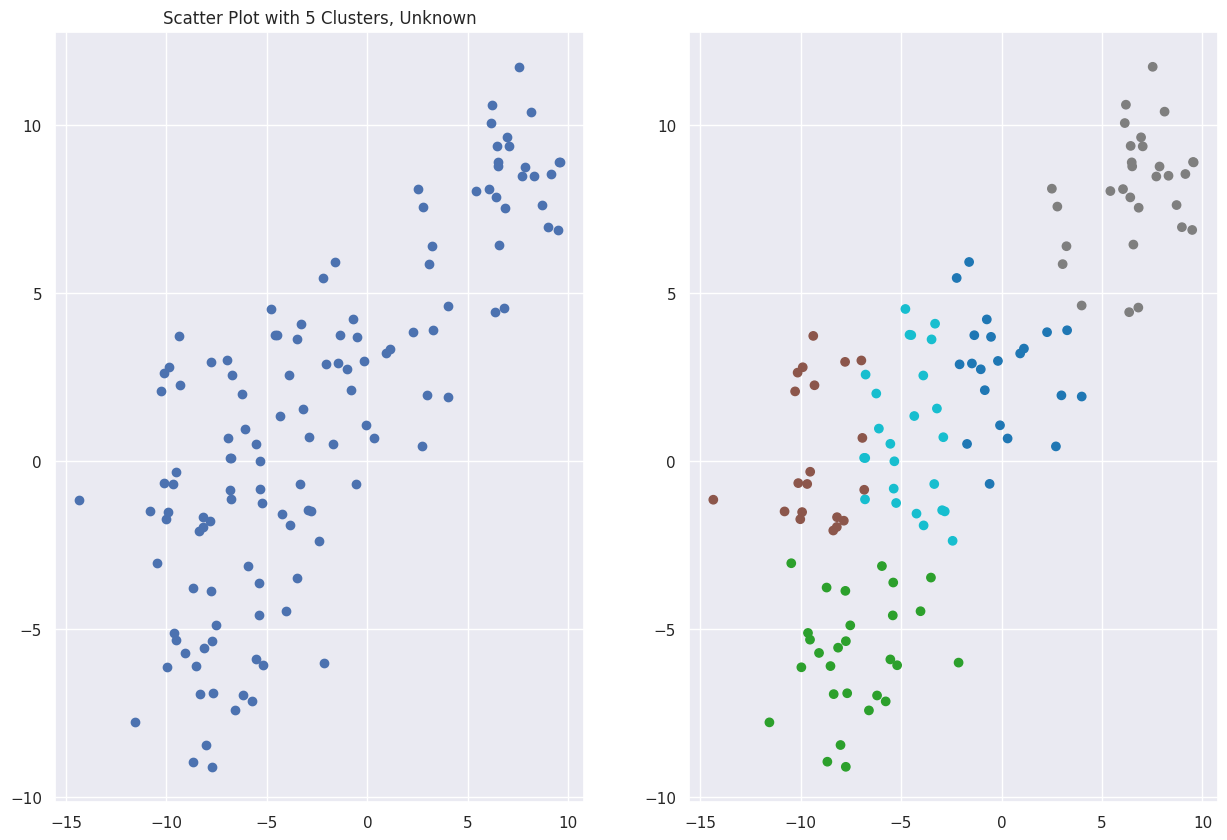

In [10]:
new_centers = update_centers(X, new_centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Scatter Plot with 5 Clusters, Unknown')

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

This model looks pretty consistent! It doesn't exactly match the plot from our randomly generated data in the beginning, but there are clear similarities.

## Varying k Values

Let's try another model with a k value of 3 and see how the data is clustered.

In [11]:
def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)

    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers


In [12]:
centers = k_means_clustering(X, 3)

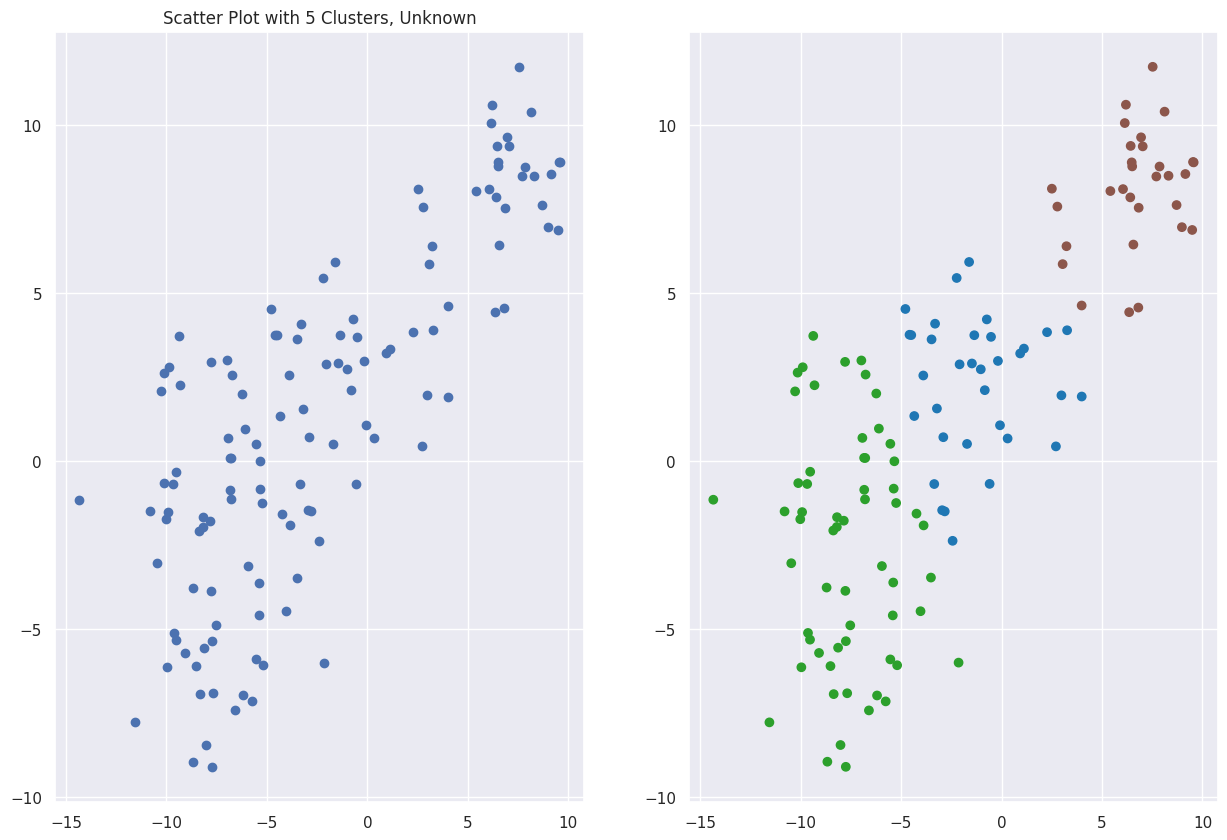

In [13]:
centers = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1])
ax1.set_title('Scatter Plot with 5 Clusters, Unknown')

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

The plot shows 3 clusters. It's a bit easier to tell here that the groupings are somewhat spherical, which is typical for k-means clustering. To look for data patterns with unsupervised learning methods which are not spherically clustered, DBSCAN would be more useful since it functions by density spread rather than only proximity.